# fNirs analysis

In [1458]:
import pandas as pd
f_Nirs=pd.read_csv("D:/Dataset/f_Nirsdatasets/1-6 A,B GLM/1st level data/cB.csv")
f_Nirs.drop(['Group','Subject'],axis=1,inplace=True)
f_Nirs=f_Nirs[6:12] #day1
f_Nirs.fillna(f_Nirs['Ch01'].mean(),inplace=True)
f_Nirs

,Ch01,Ch02,Ch03,Ch04,Ch05,Ch06,Ch07,Ch08,Ch09,Ch10,Ch11,Ch12,Ch13,Ch14,Ch15
6,-4.336809e-17,-8.483882e-18,-2.385245e-17,-2.168404e-17,-4.531965e-17,-2.428613e-17,-4.933120e-17,-5.713745e-17,-4.515702e-17,-5.009014e-17,-5.811324e-17,-3.567025e-17,-3.339343e-17,-3.447763e-17,-1.778092e-17
7,1.192622e-18,-2.320193e-17,-1.089623e-17,-2.347298e-17,-3.447763e-17,-1.512462e-17,-3.935654e-17,-4.163336e-17,-2.244298e-17,-3.122502e-17,-3.144186e-17,-1.745565e-17,-1.252254e-17,4.770490e-18,-8.456777e-18
8,9.757820e-19,1.441989e-17,1.040834e-17,2.309351e-17,1.490778e-17,1.073360e-17,2.623769e-17,9.974660e-18,1.311885e-17,3.480289e-17,2.059984e-17,1.685934e-17,1.843144e-17,1.111307e-17,1.070650e-17
9,-9.519295e-18,4.865899e-16,-7.860466e-18,1.071192e-16,1.225148e-17,2.558717e-17,1.106970e-16,1.056013e-16,3.241764e-17,9.389191e-17,3.941075e-17,2.656295e-17,5.442695e-17,7.784572e-17,1.138412e-16
10,-2.612927e-17,-1.891933e-17,-1.550409e-17,-1.998998e-18,-9.269929e-18,-7.738493e-18,-5.976664e-18,-3.415237e-18,-1.031347e-17,-4.445229e-18,-6.952446e-18,-7.209944e-18,-1.008308e-17,-1.019150e-17,-1.531436e-17
11,1.973248e-17,6.667843e-18,1.428436e-17,1.493488e-17,9.757820e-18,8.565197e-18,2.846031e-17,1.273938e-17,2.423192e-17,3.816392e-17,2.808084e-17,2.293088e-17,4.141652e-17,2.612927e-17,2.081668e-17


import pandas as pd
f_Nirs=pd.DataFrame()
for i in range(7,13): #day1
    raw=pd.read_csv("D:/Dataset/f_Nirsdatasets/result/"+str(i)+"/Group data/Group_statistic(C-A).csv")
    f_Nirs[i]=raw.iloc[:,1]
f_Nirs=f_Nirs.transpose()
f_Nirs

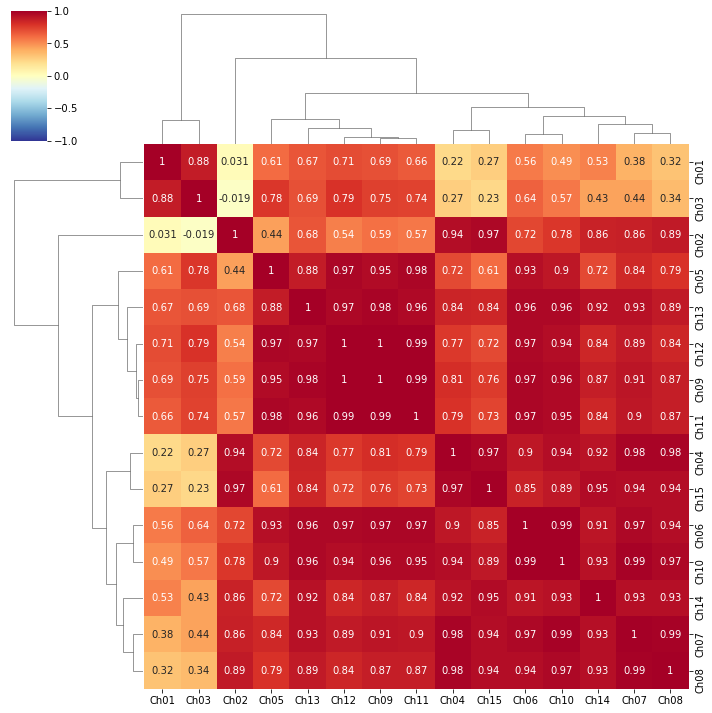

In [1459]:
import numpy as np
import seaborn as sns

df_fNirs=f_Nirs.corr()
sns.clustermap(df_fNirs, 
               annot = True,      
               cmap = 'RdYlBu_r',  
               vmin = -1, vmax = 1, 
              )

In [1460]:
from sklearn.preprocessing import StandardScaler

std=StandardScaler()
f_Nirs_std=std.fit_transform(f_Nirs)
f_Nirs_std

array([[-1.65751947e+00, -4.60083181e-01, -1.34049628e+00,
        -8.62528001e-01, -1.55179265e+00, -1.41175920e+00,
        -1.15038311e+00, -1.17944772e+00, -1.60859038e+00,
        -1.32193429e+00, -1.64070103e+00, -1.60343363e+00,
        -1.38346676e+00, -1.35335166e+00, -7.73789962e-01],
       [ 5.24544919e-01, -5.40065626e-01, -3.90522637e-01,
        -9.03116348e-01, -1.09245590e+00, -8.70796013e-01,
        -9.62641814e-01, -8.82073011e-01, -7.74389725e-01,
        -9.29860597e-01, -8.69067708e-01, -8.07049744e-01,
        -7.13626429e-01, -2.23434379e-01, -5.68136796e-01],
       [ 5.13926601e-01, -3.35616945e-01,  1.17156791e+00,
         1.53410628e-01,  9.99822987e-01,  6.56064571e-01,
         2.71961299e-01,  1.07789669e-01,  5.31661890e-01,
         4.42397328e-01,  6.36558278e-01,  6.93280617e-01,
         2.79825073e-01, -4.08372497e-02, -1.45471716e-01],
       [ 7.54476886e-17,  2.23030238e+00, -1.67934671e-01,
         2.05983299e+00,  8.87285484e-01,  1.53312914

[0 0 1 2 0 1]


0.44986417765906855

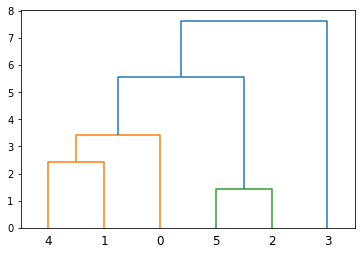

In [1461]:
from scipy.cluster.hierarchy import linkage,dendrogram,cut_tree
from sklearn.metrics import silhouette_score

links=linkage(f_Nirs_std,'average')
dendrogram(links,orientation='top',distance_sort='descending',show_leaf_counts=True)
cluster_fNirs=cut_tree(links,3)
cluster_fNirs=cluster_fNirs.reshape(-1,)
print(cluster_fNirs)
silhouette_score(f_Nirs_std,cluster_fNirs)

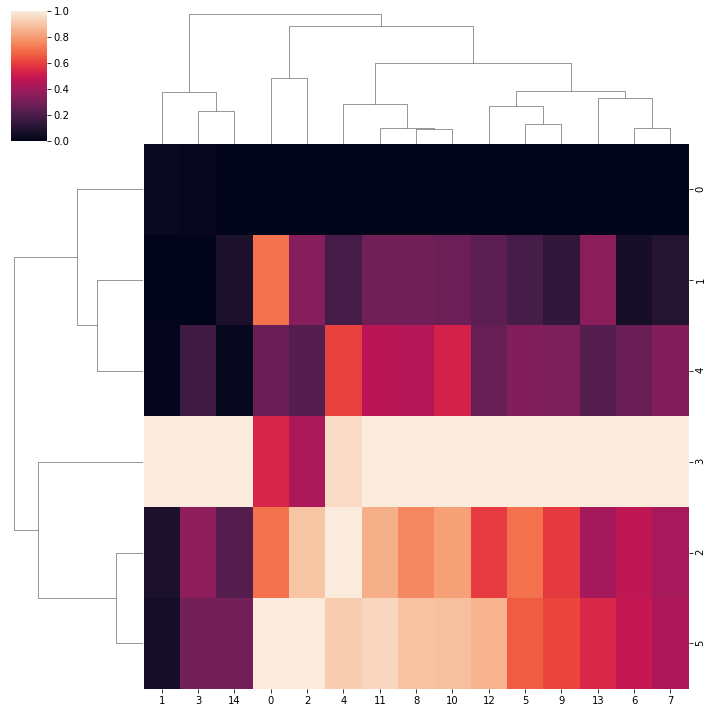

In [1462]:
import seaborn as sns
sns.clustermap(f_Nirs_std, metric="euclidean", standard_scale=1, method="average")

# 데이터 전처리

In [1463]:
self_report=pd.read_csv("D:/Dataset/f_Nirsdatasets/k1~12_self-report_dataset.csv")
day1=self_report[6:12] #day1
day1.drop(['subjectkey','date','age','sex','right_handed','piano_year','piano_major','impro_experience','condition','post_B_IF_10','pre_SE_10','pre_SE_11'
           ,'post_B_diff','post_B_SE_10','post_B_SE_11'],axis=1,inplace=True) # A B C
for i in range(1,10):
    day1.drop(['pre_SE_0'+str(i)],axis=1,inplace=True)
    day1.drop(['post_B_IF_0'+str(i)],axis=1,inplace=True)
    day1.drop(['post_B_SE_0'+str(i)],axis=1,inplace=True)
day1.loc[:,'post_A_SE_05']=6-day1.loc[:,'post_A_SE_05']
day1.loc[:,'post_A_SE_07']=6-day1.loc[:,'post_A_SE_07']
day1.loc[:,'post_C_SE_05']=6-day1.loc[:,'post_C_SE_05']
day1.loc[:,'post_C_SE_07']=6-day1.loc[:,'post_C_SE_07']
day1

C:\Users\bml05\AppData\Local\Temp\ipykernel_10104\2265906424.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  day1.drop(['subjectkey','date','age','sex','right_handed','piano_year','piano_major','impro_experience','condition','post_B_IF_10','pre_SE_10','pre_SE_11'
C:\Users\bml05\AppData\Local\Temp\ipykernel_10104\2265906424.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  day1.drop(['pre_SE_0'+str(i)],axis=1,inplace=True)
C:\Users\bml05\AppData\Local\Temp\ipykernel_10104\2265906424.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentatio

,post_A_SE_01,post_A_SE_02,post_A_SE_03,post_A_SE_04,post_A_SE_05,post_A_SE_06,post_A_SE_07,post_A_SE_08,post_A_SE_09,post_A_SE_10,...,post_C_IF_02,post_C_IF_03,post_C_IF_04,post_C_IF_05,post_C_IF_06,post_C_IF_07,post_C_IF_08,post_C_IF_09,post_C_IF_10,post_C_diff
6,4,4,4,5,3,3,3,4,5,5,...,3,4,4,4,5,5,5,3,4,3
7,3,4,5,5,3,4,3,5,5,5,...,4,4,4,4,4,4,4,3,4,2
8,5,4,4,5,2,4,2,5,4,5,...,5,5,5,4,5,5,5,1,4,3
9,4,4,4,5,2,4,3,4,5,5,...,2,4,5,5,5,5,5,2,5,5
10,4,4,4,5,2,1,2,4,5,4,...,4,5,4,4,4,5,5,2,4,4
11,4,4,4,5,3,4,2,5,5,5,...,5,5,5,5,4,5,5,1,5,2


In [1464]:
SE_1=day1.loc[:,'post_A_SE_01':'post_A_SE_11'] # A B C
IF_1=day1.loc[:,'post_A_IF_01':'post_A_IF_10']
SE_2=day1.loc[:,'post_C_SE_01':'post_C_SE_11']
IF_2=day1.loc[:,'post_C_IF_01':'post_C_IF_10']
SE_1=SE_1.reset_index(drop=True)
SE_2=SE_2.reset_index(drop=True)
IF_1=IF_1.reset_index(drop=True)
IF_2=IF_2.reset_index(drop=True)

note=pd.read_csv("D:/Dataset/f_Nirsdatasets/k1~12_note.csv")
day1_note=note.iloc[6:12,:] # day 1
day1_note=day1_note.reset_index(drop=True)
day1_AC=day1_note.drop(['B','Unnamed: 0'],axis=1) #A B C

SE_score=pd.DataFrame(SE_1.sum(axis=1)/11)
SE_score=pd.concat([SE_score,SE_2.sum(axis=1)/11],axis=1)
SE_score=SE_score.reset_index(drop=True)
IF_score=pd.DataFrame(IF_1.sum(axis=1)/10)
IF_score=pd.concat([IF_score,IF_2.sum(axis=1)/11],axis=1)
IF_score=IF_score.reset_index(drop=True)
day1_AC

,A,C
0,671,1087
1,1406,160
2,1313,263
3,1338,158
4,1253,2564
5,1536,451


In [1465]:
from sklearn.preprocessing import StandardScaler

std=StandardScaler()
total_survey=pd.concat([SE_score,IF_score],axis=1)
total_survey=pd.concat([total_survey,day1_AC],axis=1)
total_survey

,0,0,0,0,A,C
0,4.090909,3.545455,2.5,3.818182,671,1087
1,4.272727,4.090909,3.5,3.545455,1406,160
2,4.090909,4.090909,3.3,4.000000,1313,263
3,4.090909,4.181818,3.9,3.909091,1338,158
4,3.636364,4.000000,3.4,3.818182,1253,2564
5,4.090909,3.545455,3.2,4.090909,1536,451


# KMeans clustering

In [1466]:
from sklearn.preprocessing import StandardScaler

std=StandardScaler()
SE_score=std.fit_transform(SE_score)
IF_score=std.fit_transform(IF_score)
day1_AC=std.fit_transform(day1_AC)

In [1467]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=3,random_state=1)
kmeans.fit_transform(SE_score)
SE_result=kmeans.labels_
print(kmeans.labels_)
kmeans.fit_transform(IF_score)
IF_result=kmeans.labels_
print(kmeans.labels_)
kmeans.fit_transform(day1_AC)
note_result=kmeans.labels_
print(kmeans.labels_)

[0 1 1 1 2 0]
[1 2 0 0 0 0]
[1 0 0 0 2 0]


In [1468]:
print(silhouette_score(SE_score,SE_result))
print(silhouette_score(IF_score,IF_result))
print(silhouette_score(day1_AC,note_result))

0.66524346389592
0.22874979897018208
0.5425419313786566


In [1469]:
from sklearn.metrics.cluster import rand_score
cluster=cluster_fNirs.reshape(-1,)
print(rand_score(SE_result,cluster_fNirs))
print(rand_score(IF_result,cluster_fNirs))
print(rand_score(note_result,cluster_fNirs))

0.4666666666666667
0.4666666666666667
0.4666666666666667


# total survey

In [1470]:
total_survey

,0,0,0,0,A,C
0,4.090909,3.545455,2.5,3.818182,671,1087
1,4.272727,4.090909,3.5,3.545455,1406,160
2,4.090909,4.090909,3.3,4.000000,1313,263
3,4.090909,4.181818,3.9,3.909091,1338,158
4,3.636364,4.000000,3.4,3.818182,1253,2564
5,4.090909,3.545455,3.2,4.090909,1536,451


In [1471]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=3,random_state=1)
kmeans.fit_transform(total_survey)
total_result=kmeans.labels_
print(kmeans.labels_)
print(silhouette_score(total_survey,total_result))
print(rand_score(total_result,cluster_fNirs))

[2 0 0 0 1 0]
0.5377444303847688
0.4666666666666667


c:\Users\bml05\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


# hierarchy clustering

[0 1 1 1 2 0]


c:\Users\bml05\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.66524346389592

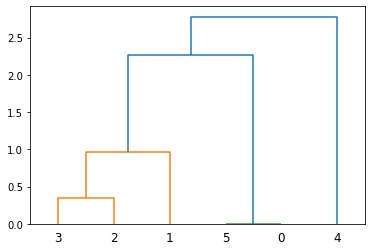

In [1472]:
links=linkage(SE_score,'average')
dendrogram(links,orientation='top',distance_sort='descending',show_leaf_counts=True)
cluster=cut_tree(links,3)
SE_result=cluster.reshape(-1,)
print(SE_result)
silhouette_score(SE_score,cluster)

[0 1 2 2 2 2]


c:\Users\bml05\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.22874979897018208

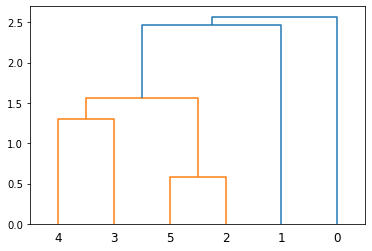

In [1473]:
links=linkage(IF_score,'average')
dendrogram(links,orientation='top',distance_sort='descending',show_leaf_counts=True)
cluster=cut_tree(links,3)
IF_result=cluster.reshape(-1,)
print(IF_result)
silhouette_score(IF_score,cluster)

[0 1 1 1 2 1]


c:\Users\bml05\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.5425419313786566

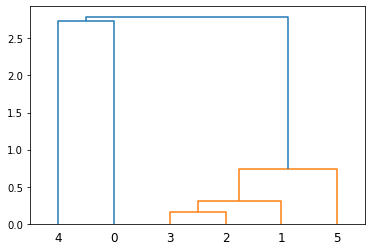

In [1474]:
links=linkage(day1_AC,'average')
dendrogram(links,orientation='top',distance_sort='descending',show_leaf_counts=True)
cluster=cut_tree(links,3)
note_result=cluster.reshape(-1,)
print(note_result)
silhouette_score(day1_AC,cluster)

[0 1 1 1 2 1]


0.5377444303847688

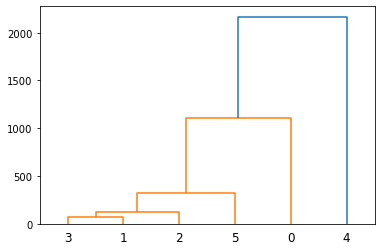

In [1475]:
links=linkage(total_survey,'average')
dendrogram(links,orientation='top',distance_sort='descending',show_leaf_counts=True)
cluster=cut_tree(links,3)
total_result=cluster.reshape(-1,)
print(total_result)
silhouette_score(total_survey,total_result)

In [1476]:
print(rand_score(SE_result,cluster_fNirs))
print(rand_score(IF_result,cluster_fNirs))
print(rand_score(note_result,cluster_fNirs))
print(rand_score(total_result,cluster_fNirs))

0.4666666666666667
0.4666666666666667
0.4666666666666667
0.4666666666666667
